In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.api import VAR

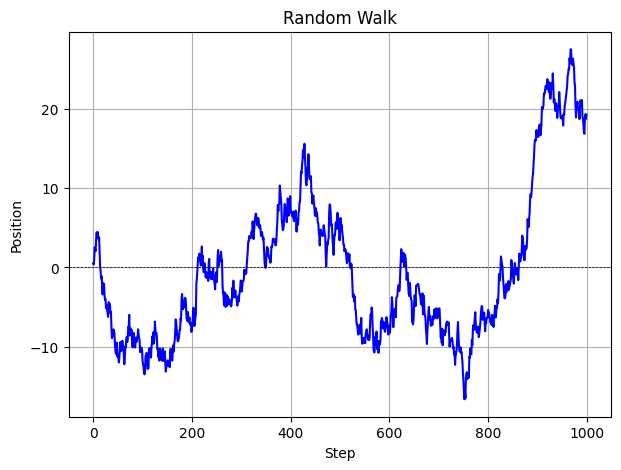

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 28, Jul, 2025
Time:                     09:26:16
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -56.5290
Nobs:                     999.000    HQIC:                  -56.5473
Log likelihood:           25421.9    FPE:                2.73503e-25
AIC:                     -56.5585    Det(Omega_mle):     2.71868e-25
--------------------------------------------------------------------
Results for equation Y
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.089098         0.067921           -1.312           0.190
L1.Y          0.994007         0.003626          274.170           0.000
L1.X          0.000212         0.000120            1.767           0.077

Results for equation X

In [2]:
# generate a plot of a random walk
np.random.seed(42)
n_steps = 1000
steps = np.random.normal(loc=0, scale=1, size=n_steps)
random_walk = np.cumsum(steps)

plt.figure(figsize=(7, 5))
plt.plot(random_walk, label='Random Walk', color='blue')
plt.title('Random Walk')
plt.xlabel('Step')
plt.ylabel('Position')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.show()

# calculate the autocorrelation using var model
data = pd.DataFrame(pd.DataFrame({'Y': random_walk, 'X': np.arange(n_steps)}))
model = VAR(data)
results = model.fit(maxlags=1, ic='aic')
print(results.summary())

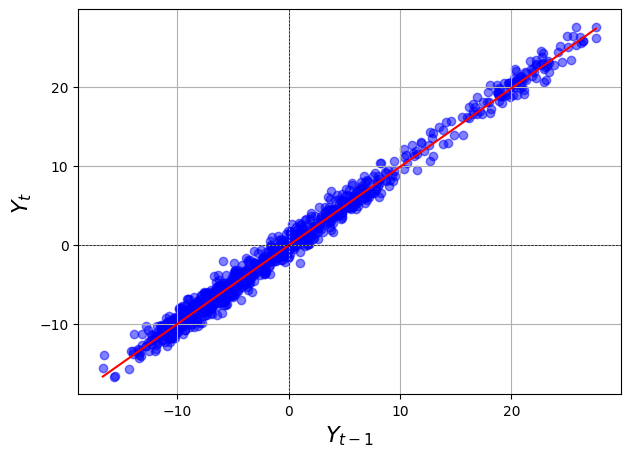

In [28]:
# plot y_t+1 against y_t from the random walk
plt.figure(figsize=(7, 5))
plt.scatter(random_walk[:-1], random_walk[1:], alpha=0.5, color='blue')
# plot the line with the coefficients from the VAR model
coef = results.params['Y']['L1.Y']
const = results.params['Y']['const']
x = np.linspace(random_walk.min(), random_walk.max(), 100)
plt.plot(x, coef * x + const, color='red', label='Fitted Line')

plt.xlabel(r'$Y_{t-1}$', fontsize=16)
plt.ylabel(r'$Y_{t}$', fontsize=16)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.show()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 22, Jul, 2025
Time:                     09:03:35
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -63.2160
Nobs:                     99.0000    HQIC:                  -63.3097
Log likelihood:           2862.03    FPE:                3.00154e-28
AIC:                     -63.3733    Det(Omega_mle):     2.82757e-28
--------------------------------------------------------------------
Results for equation X
           coefficient       std. error               t-stat            prob
----------------------------------------------------------------------------
const         0.252525         0.000000    5617383398525.215           0.000
L1.X          1.000000         0.000000  548817347868727.438           0.000
L1.Y         -0.000000         0.000000               -0.689           0.491

Re

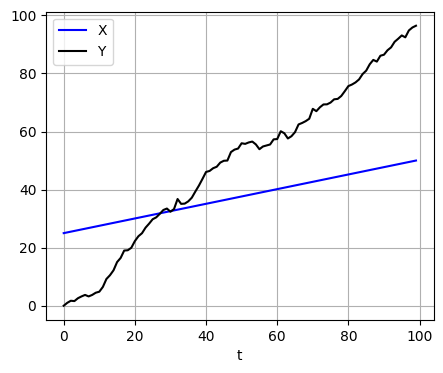

In [3]:
N = 100

X = np.linspace(N/4, N/2, N)

np.random.seed(9)

# Y is a constant growing function with some noise
def growing_function(Y_t, C=1):
    return Y_t + C + np.random.normal(0, 1)

Y = np.zeros_like(X)
for i in range(1, len(X)):
    Y[i] = growing_function(Y[i-1])

plt.figure(figsize=(5, 4))
plt.plot(X, label='X', color='blue')
# plt.scatter(np.linspace(0,N-1,N), X, color='blue')
plt.plot(Y, label='Y', color='black')
# plt.scatter(np.linspace(0,N-1,N), Y, color='black')
plt.xlabel('t')
plt.legend()
plt.grid()

data = pd.DataFrame(pd.DataFrame({'X': X, 'Y': Y}))
model = VAR(data)
results = model.fit(maxlags=1, ic='aic')
print(results.summary())

causality = results.test_causality(caused='Y', causing=['X'], kind='f')
print(causality.summary())

causality = results.test_causality(caused='X', causing=['Y'], kind='f')
print(causality.summary())

# calculate the spearman correlation
from scipy.stats import spearmanr
corr, p_value = spearmanr(X, Y)
print(f'Spearman correlation: {corr}, p-value: {p_value}')

In [4]:
def Paramecium_Didinium(CC = '0.375', **kwargs):
    kwargs.setdefault('data')
    # read from predator_prey_data/CC0.375.txt
    data = pd.read_csv(f'predator_prey_data/CC{CC}.txt', sep = ',')
    return data['t'].values, data['x'].values, data['y'].values

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 22, Jul, 2025
Time:                     09:03:38
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    11.3507
Nobs:                     64.0000    HQIC:                   11.2281
Log likelihood:          -532.371    FPE:                    69456.9
AIC:                      11.1483    Det(Omega_mle):         63376.2
--------------------------------------------------------------------
Results for equation X
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        68.990155        11.515166            5.991           0.000
L1.X          0.795283         0.053576           14.844           0.000
L1.Y         -1.047217         0.172376           -6.075           0.000

Results for equation Y

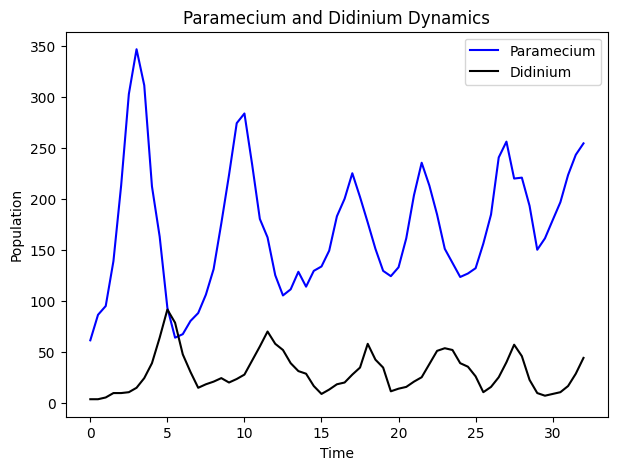

In [5]:
t, x, y = Paramecium_Didinium(CC = '0.375')
plt.figure(figsize=(7, 5))
plt.plot(t, x, label='Paramecium', color='blue')
plt.plot(t, y, label='Didinium', color='black')
plt.title('Paramecium and Didinium Dynamics')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()

data = pd.DataFrame(pd.DataFrame({'X': x, 'Y': y}))
model = VAR(data)
results = model.fit(maxlags=1, ic='aic')
print(results.summary())
causality = results.test_causality(caused='Y', causing=['X'], kind='f')
print(causality.pvalue)

data = pd.DataFrame(pd.DataFrame({'X': y, 'Y': x}))
model = VAR(data)
results = model.fit(maxlags=1, ic='aic')
causality = results.test_causality(caused='Y', causing=['X'], kind='f')
print(causality.pvalue)